In [1]:
#Los datos estiran la media hacia uno de los extremos

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# muestra
muestra = np.array([15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9])

In [4]:
np.mean(muestra)  # media

np.float64(20.083333333333332)

In [5]:
np.median(muestra)  # mediana

np.float64(14.0)

In [6]:
np.var(muestra)  # varianza

np.float64(614.7430555555555)

In [7]:
np.var([15, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9])

np.float64(21.28925619834711)

In [8]:
np.std(muestra)

np.float64(24.794012494059036)

In [9]:
np.std([15, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]) # desviación estándar

np.float64(4.614028196527099)

# Diagrama de cajas (BoxPlot)

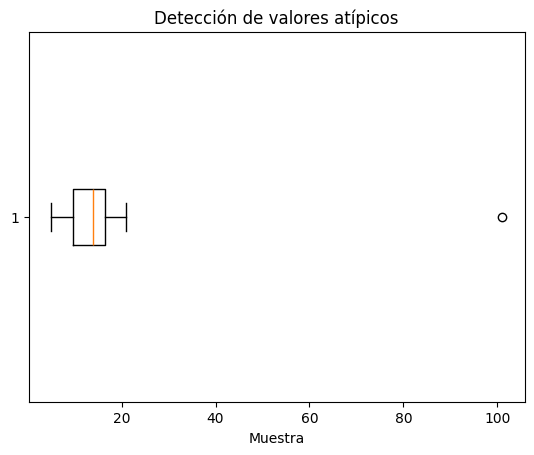

In [10]:
plt.boxplot(muestra, vert=False)
plt.title("Detección de valores atípicos")
plt.xlabel("Muestra")
plt.show()

In [11]:
outliers = []

In [12]:
def encontrar_outliers(datos):
    umbral = 3  # numero de desviaciones estandar a superar
    media = np.mean(datos)
    desvstd = np.std(datos)
    for xi in datos:
        puntaje_z = (xi - media) / desvstd
        if abs(puntaje_z) > umbral:
            outliers.append(xi)
    return media, desvstd, outliers

In [13]:
media, desviacion, extremos = encontrar_outliers(muestra)
print(
    f"Media: {media: .2f}, Desviación estándar: {desviacion: .2f}, Valores atípicos: {extremos}"
)

Media:  20.08, Desviación estándar:  24.79, Valores atípicos: [np.int64(101)]


In [14]:
outliers = [] 

In [15]:
def detectar_outliers_ric(datos):
    datos = sorted(datos)
    q1 = np.quantile(datos, 0.25)
    q3 = np.quantile(datos, 0.75)
    ric = q3 - q1
    limite_inferior = q1 - 1.5 * ric
    limite_superior = q3 + 1.5 * ric
    print(
        f"Limite inferior: {limite_inferior: .2f}, Limite superior: {limite_superior: .2f}"
    )
    for valor in datos:
        if valor < limite_inferior or valor > limite_superior:
            outliers.append(valor)
    return outliers

In [16]:
extremos = detectar_outliers_ric(muestra)
print(f"Valores atípicos: {extremos}")

Limite inferior: -0.38, Limite superior:  26.62
Valores atípicos: [np.int64(101)]


### Manejo de valores aticipos

#### Recortar valores atipicos

In [17]:
for i in extremos:
    temporal = np.delete(muestra, np.where(muestra == i))
    print('lista con valores eliminados:', temporal)

lista con valores eliminados: [15 18  7 13 16 11 21  5 15 10  9]
